In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('ggplot')

idx = pd.IndexSlice

In [2]:
root = Path.cwd().parent.parent.parent / "cluster_data"

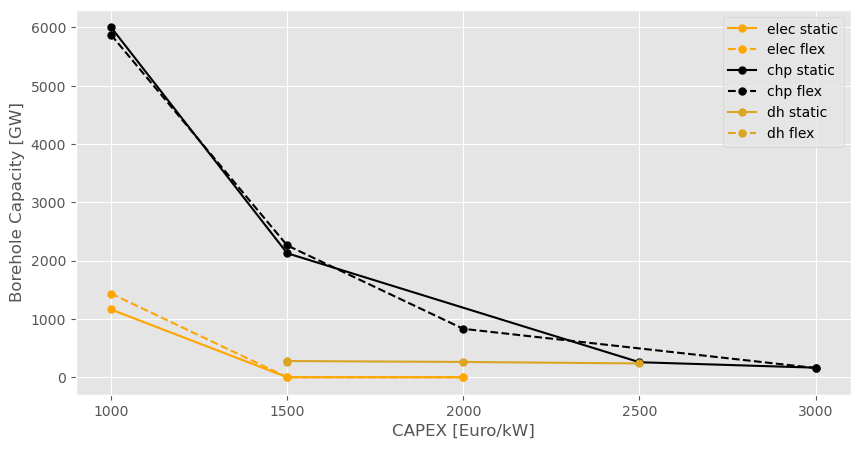

In [23]:
def get_data(mode, op):

    if mode == "chp" or mode == "dh":
        df = pd.read_csv(root / f"{mode}_data" / f"csvs_{op}" / "nodal_capacities.csv", index_col=[0,1,2], header=[0,1,2,3,4,5,6])
    elif mode == "elec":
        df = pd.read_csv(root / f"{mode}_data" / "csvs" / "nodal_capacities.csv", index_col=[0,1,2], header=[0,1,2,3,4,5,6])


    df = df.groupby(level=[0,2]).sum()
    df.columns = df.columns.droplevel([0,1,2,3,5])

    df["carrier"] = df.index.get_level_values(1)
    df.index = df.index.droplevel(1)

    df.index += " " + df.carrier

    df = df.loc[df.carrier.isin(["geothermal heat", "geothermal heat elec"])]
    df.drop("carrier", axis=1, inplace=True)
    df = df.loc[:, idx[:, op]]
    df.columns = df.columns.droplevel(1)

    return df.loc["links geothermal heat"].mul(0.5).mul(1e-3)

elec_static = get_data("elec", "static")
elec_flex = get_data("elec", "flex")
chp_static = get_data("chp", "static")
chp_flex = get_data("chp", "flex")
dh_static = get_data("dh", "static")
dh_flex = get_data("dh", "flex")

fig, ax = plt.subplots(figsize=(10, 5))

# elec_static.plot.(ax=ax, stacked=True, width=0.8, edgecolor='black', linewidth=0.5)

ax.plot(elec_static.index, elec_static.values, marker="o", color="orange", markersize=5, label="elec static")
ax.plot(elec_flex.index, elec_flex.values, marker="o", color="orange", markersize=5, linestyle="--", label="elec flex")
ax.plot(chp_static.index, chp_static.values, marker="o", color="k", markersize=5, label="chp static")
ax.plot(chp_flex.index, chp_flex.values, marker="o", color="k", markersize=5, linestyle="--", label="chp flex")
ax.plot(dh_static.index, dh_static.values, marker="o", color="goldenrod", markersize=5, label="dh static")
ax.plot(dh_flex.index, dh_flex.values, marker="o", color="goldenrod", markersize=5, linestyle="--", label="dh flex")

ax.legend()

ax.set_ylabel("Borehole Capacity [GW]")
ax.set_xlabel("CAPEX [Euro/kW]")


plt.show()
